In [9]:
import numpy as np
import pandas as pd
import glob
from scipy import stats
import cmocean as cmo
import matplotlib as mpl
from matplotlib import mlab, cm
import matplotlib.mlab as ml
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from scipy import signal
import scipy

# Display plots in SVG format
%config InlineBackend.figure_format = 'svg'

# Display plots in cells
%matplotlib inline

import morphoGrid as morph
import morphoGrid_noflex as morphnf# from scripts import morphoGrid_sl as morph_sl


In [10]:
path='/media/ratneel/Storage/Data/Sara_RA_Work'

#Loading sea-level curve
Delta_SL_A50m_f500Kyr=pd.read_csv(path+'/Delta_2020/Delta_running/data/A50m_f500Kyr.csv', sep=' ',header=None)

#Loading simulation
folder=path+'/Delta_2020/Delta_running/Synthetic/Delta_SL_A50m_f500Kyr_Te50/h5'

#Loading X-section
#hydroflex_A50=np.asarray(pd.read_csv(path+'/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_hydroisostasy_A50m_f500Kyr_Te50.csv'))



In [8]:
# np.linspace(0, 0.9, 10)
# np.arange(0,120,10)
color
# np.arange(0,120,1
len(np.linspace(0, 0.9, 12))
len(np.arange(0,120,10))

12

0
10
20
30
40
50
60
70
80
90
100
110


(60.0, 120.0)

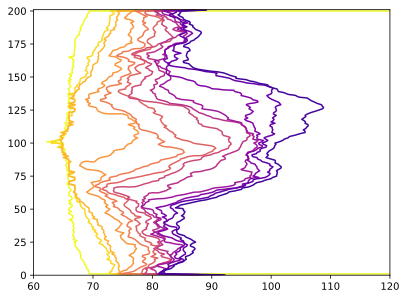

In [11]:
ub=150 #Upstream boundary
db=350 #Downstream boundary

# colormap = plt.cm.plasma_r
color=[plt.cm.plasma_r(i) for i in np.linspace(0, 0.9, 12)]

for i in np.arange(0,120,10):
    morpho = morph.morphoGrid(folder,dx=1e4)
    morpho.loadHDF5(timestep=i)
    # heatmap=plt.imshow(morpho.z[:, ub:db], interpolation='nearest', cmap='BrBG_r', vmin = 2e3, vmax =-2e3)
#     heatmap=plt.imshow(morpho.z[:, ub:db], interpolation='nearest', cmap='gist_earth')#, vmin = 2e3, vmax =-2e3
    print(i)
    plt.contour(morpho.z[:, ub:db],0, colors=color[int(i/10)])
#
plt.xlim(60, 120)



In [13]:

plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=8)
hs=99
ls=101
sea_level_time=[hs, ls]
sea_level_time_label=['HS', 'LS']
color=['blue', 'deepskyblue']




xs_i=100#index at which the cross-section is plotted
hs_SL=Delta_SL_A50m_f500Kyr[1][int(np.argwhere(Delta_SL_A50m_f500Kyr[0]==hs*1e5).flatten())]
ls_SL=Delta_SL_A50m_f500Kyr[1][int(np.argwhere(Delta_SL_A50m_f500Kyr[0]==ls*1e5).flatten())]
#vertical adjustment
v_adj=50

fig = plt.figure(figsize = (15/2.54, 15/2.54))
###########
#Sea level#
###########
plt.subplot2grid((2,2),(0,0), colspan=1)
plt.plot(Delta_SL_A50m_f500Kyr[1], Delta_SL_A50m_f500Kyr[0]/1e6, 'black')
for i in np.arange(0, len(sea_level_time),1):
# plt.plot(Delta_SL_A50m_f500Kyr[1][int(np.argwhere(Delta_SL_A50m_f500Kyr[0]==hs*1e5).flatten())], Delta_SL_A50m_f500Kyr[0][int(np.argwhere(Delta_SL_A10m_f500Kyr[0]==hs*1e5).flatten())]/1e6, '*', color='blue')
    plt.plot(Delta_SL_A50m_f500Kyr[1][int(np.argwhere(Delta_SL_A50m_f500Kyr[0]==sea_level_time[i]*1e5).flatten())], Delta_SL_A50m_f500Kyr[0][int(np.argwhere(Delta_SL_A50m_f500Kyr[0]==sea_level_time[i]*1e5).flatten())]/1e6, '*', color=color[i])
    if i==0:
        plt.text(Delta_SL_A50m_f500Kyr[1][int(np.argwhere(Delta_SL_A50m_f500Kyr[0]==sea_level_time[i]*1e5).flatten())]+10, Delta_SL_A50m_f500Kyr[0][int(np.argwhere(Delta_SL_A50m_f500Kyr[0]==sea_level_time[i]*1e5).flatten())]/1e6, sea_level_time_label[i], color=color[i], horizontalalignment='right', verticalalignment='top', size=9)
    if i==1:
        plt.text(Delta_SL_A50m_f500Kyr[1][int(np.argwhere(Delta_SL_A50m_f500Kyr[0]==sea_level_time[i]*1e5).flatten())]-10, Delta_SL_A50m_f500Kyr[0][int(np.argwhere(Delta_SL_A50m_f500Kyr[0]==sea_level_time[i]*1e5).flatten())]/1e6, sea_level_time_label[i], color=color[i], horizontalalignment='left', size=9)

plt.xlabel('Sea-level(m)'); plt.ylabel('Time(Myr)')
plt.xlim([100,-100]);plt.ylim([0, 12])
plt.grid(linestyle ='--')

##########
#Map view#
##########
plt.subplot2grid((2,2),(0,1), colspan=2)
morpho = morph.morphoGrid(folder,dx=1e4)
morpho.loadHDF5(timestep=hs)
# heatmap=plt.imshow(morpho.z[:, ub:db], interpolation='nearest', cmap='BrBG_r', vmin = 2e3, vmax =-2e3)
heatmap=plt.imshow(morpho.z[:, ub:db], interpolation='nearest', cmap='gist_earth', vmin = 2e3, vmax =-2e3)

plt.contour(morpho.z[:, ub:db],0, colors=color[0],  linestyles= 'dashed')
#plt.plot(np.argwhere(morpho.z[100,150:350]<=0)[0], 100, 'o', color='darkgrey')
#plt.plot((SL_A50m_f500Kyr_Te50.X[hs]/1e4)-ub, SL_A50m_f500Kyr_Te50.Y[hs]/1e4, 'o')

morpho = morph.morphoGrid(folder,dx=1e4)
morpho.loadHDF5(timestep=ls)
plt.contour(morpho.z[:,  ub:db],0, colors=color[1], linestyles= 'dashed')
#plt.plot(np.argwhere(morpho.z[100,150:350]<=0)[0], 100, 'o', color='darkgrey')
plt.xticks([])
plt.yticks([])
plt.plot((140,190), (190,190), 'white', linewidth=4)
plt.text(150,180, '500 (km)', color='white')
cbar = plt.colorbar(heatmap,fraction=0.046, pad=0.04, ticks=[2e3, 1e3, 0, -1e3, -2e3], orientation='horizontal', aspect=25)
cbar.ax.invert_xaxis()
cbar.ax.set_xlabel('Elevation/Bathymetry (km)',  labelpad=5, rotation=0)   

###############
#Cross-section#
###############
###########
#highstand#
###########
ax1=plt.subplot2grid((2,2),(1,0), colspan=2)
morpho = morph.morphoGrid(folder,dx=1e4)
morpho.loadHDF5(timestep=hs)
flex_hs=morpho.flexure[xs_i,ub:db]
#plot longitidunal profile highstand
ax1.plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i, ub:db]-v_adj, color=color[0], zorder=10)
#testing if elevation[ls]=elevation(hs)+hydro(hs)+hydro(hs+1)YES!!!
# ax1.plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i, ub:db]+hydroflex_A50[ub:db, hs]+hydroflex_A50[ub:db, hs+1], color='pink')

#plot sea level highstand
ax1.plot((morpho.x[xs_i, int(np.where(morpho.z[xs_i,:]<=hs_SL)[0][0])]/1e6, morpho.x[xs_i, int(np.where(morpho.z[xs_i,:]<=hs_SL)[0][-1])]/1e6), 
         (hs_SL-v_adj,hs_SL-v_adj), color=color[0], linestyle='--')

###########################################
#time step between hightstand and lowstand#
###########################################
# morpho = morph.morphoGrid(folder,dx=1e4)
# morpho.loadHDF5(timestep=100)
# ax1.plot(morpho.x[100,ub:db]/1e6, morpho.z[100, ub:db], color='k')

###########
#low stand#
###########
morpho = morph.morphoGrid(folder,dx=1e4)
morpho.loadHDF5(timestep=ls)
ax1.plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db]-v_adj, color=color[1])

#####################
#Sea-level low-stand#
#####################
ax1.plot((morpho.x[100, int(np.where(morpho.z[100,:]<=ls_SL)[0][0])]/1e6, morpho.x[100, int(np.where(morpho.z[100,:]<=ls_SL)[0][-1])]/1e6), 
        (ls_SL-v_adj,ls_SL-v_adj), color=color[1], linestyle='--')
ax1.set_ylim(-1000,600); ax1.set_xlim(1.5,3); ax1.set_xlim(1.5,3)
# ax1.set_ylim(-2000,500); ax1.set_xlim(1.5,3.5); ax1.set_xlim(1.5,3.5)

ax1.set_xlabel('Distance x $10^3$ (km)'); ax1.set_ylabel('Elevation (m)', labelpad=1e-5)

#A second axes that shares the same x-axis
ax2 = ax1.twinx() 



########################
#hydroflex at hs+(hs+1)#
########################
'''
ax2.plot(morpho.x[xs_i, ub:db]/1e6, hydroflex_A50[ub:db, hs]+hydroflex_A50[ub:db, hs+1], 'grey')

ax2.set_ylabel('Hydroisostasy (m)', color='grey') 
ax2.tick_params(axis='y', labelcolor='grey')
ax2.set_ylim(-100,60)
# ax2.set_ylim(-200,50)
'''
fig.tight_layout(pad=0.001)  # otherwise the right y-label is slightly clipped
fig.subplots_adjust(wspace = 0.2)

fig.savefig('./figures/Xsection_amplitud_HS_LS.pdf', dpi=300)

pass

ValueError: Length of values (1) does not match length of index (12000)